# Model for Predicting population

### The aim of this project is to :

#### * Identify the city in Tamil Nadu with the highest population
#### * Create a model to predict population in this city using the following parameters
+ Birth Rate
+ Death Rate
+ Migration in Rate

#### * Identify a few places in this city 

#### Import pandas library

In [1]:
import pandas as pd

#### Scrape the following page 

In [2]:
tables=pd.read_html('https://www.citypopulation.de/php/india-tamilnadu.php')

In [3]:
df=tables[0]
df.head()

,Name,Status,PopulationCensus1991-03-01,PopulationCensus2001-03-01,PopulationCensus2011-03-01,Unnamed: 5
0,Ariyalur,District,636400,695524,754894,→
1,Chennai,District,3841396,4343645,4646732,→
2,Coimbatore,District,2493700,2916620,3458045,→
3,Cuddalore,District,2122759,2285395,2605914,→
4,Dharmapuri,District,1123600,1295182,1506843,→


### We can see that this table contains population data of different districts in TN according to data from 3 different census(1991,2001,2011).
### We do not need the columns 'Unnamed: 5',Status and the populations in 1991 and 2001 since we are only trying to identify the highest population according to the most recent census(2011).
### Let us remove the unwanted columns

In [4]:
df.shape

(33, 6)

### Cleaning the data

In [5]:
df=df.drop(['Unnamed: 5','Status','PopulationCensus1991-03-01','PopulationCensus2001-03-01'],axis=1)

In [6]:
df.head()

,Name,PopulationCensus2011-03-01
0,Ariyalur,754894
1,Chennai,4646732
2,Coimbatore,3458045
3,Cuddalore,2605914
4,Dharmapuri,1506843


### Let us rename the column containing population count

In [7]:
df=df.rename(columns={'PopulationCensus2011-03-01':'Population'})

In [8]:
df

,Name,Population
0,Ariyalur,754894
1,Chennai,4646732
2,Coimbatore,3458045
3,Cuddalore,2605914
4,Dharmapuri,1506843
5,Dindigul,2159775
6,Erode,2251744
7,Kanchipuram (Kancheepuram),3998252
8,Kanniyakumari (Kanyakumari),1870374
9,Karur,1064493


### The above dataframe contains just two columns: the district name and the population in the respective district in 2011

### We can see that some districts have multiple names
### Lets remove the word that comes in brackets.

In [9]:
for i, name in enumerate(df['Name']):
    si = name.find('(')
    if (si != -1):
        si = si - 1
        df['Name'][i] = name[:si]
        print(df['Name'][i])

Kanchipuram
Kanniyakumari
Thiruvallur
Thiruvarur


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Set index to 'Name'

In [10]:
df=df.set_index('Name')

In [11]:
df

,Population
Name,
Ariyalur,754894
Chennai,4646732
Coimbatore,3458045
Cuddalore,2605914
Dharmapuri,1506843
Dindigul,2159775
Erode,2251744
Kanchipuram,3998252
Kanniyakumari,1870374


### We remove the row containing 'Tamil Nadu' from the dataframe since it contains the total population.

In [12]:
df=df.drop('Tamil Nadu',axis=0)


In [13]:
df

,Population
Name,
Ariyalur,754894
Chennai,4646732
Coimbatore,3458045
Cuddalore,2605914
Dharmapuri,1506843
Dindigul,2159775
Erode,2251744
Kanchipuram,3998252
Kanniyakumari,1870374


In [14]:
df.shape

(32, 1)

### We see that 'Tamil Nadu' and its population has been removed from the dataframe.
### The dataframe now contains one row less

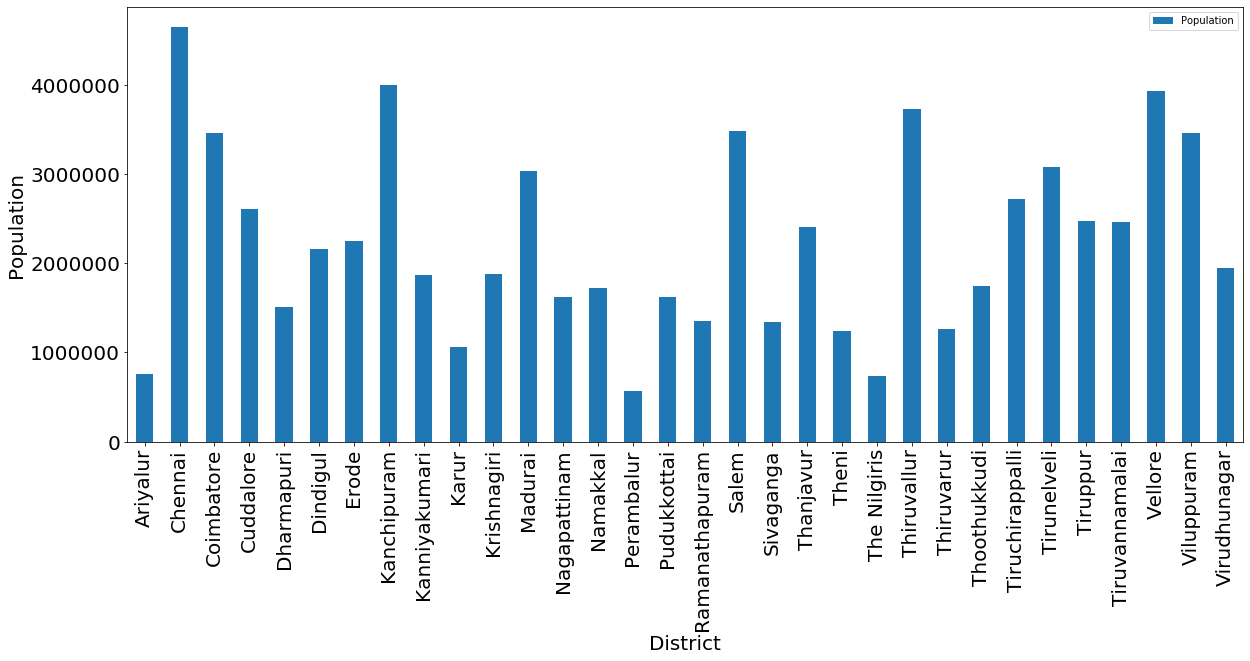

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
df.plot(kind='bar',figsize=(20,8))
plt.xlabel('District',fontsize=20)
plt.ylabel('Population',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### From the above bar plot, we can clearly see that the Chennai district has the highest population.

### Reset index to get back the indices

In [16]:
df=df.reset_index()
df.head()

,Name,Population
0,Ariyalur,754894
1,Chennai,4646732
2,Coimbatore,3458045
3,Cuddalore,2605914
4,Dharmapuri,1506843


### Let us view how the different districts in TN are distributed
### Firstly, let us fetch the latitude and longitude of each district in TN

In [17]:
from geopy.geocoders import Nominatim
latitude=[]
longitude=[]
geolocator = Nominatim(user_agent="foursquare_agent")
for i,name in enumerate(df['Name']):
    address=name
    location = geolocator.geocode(address)
    latitude.extend([location.latitude]) 
    longitude.extend([location.longitude])
    

### Join latitude and longitude as new columns to the dataframe df

In [18]:
dict={'Latitude':latitude,'Longitude':longitude}
latlng_data=pd.DataFrame(dict)
df=df.join(latlng_data)
df.head()

,Name,Population,Latitude,Longitude
0,Ariyalur,754894,11.076036,79.117455
1,Chennai,4646732,13.080172,80.283833
2,Coimbatore,3458045,11.001812,76.962842
3,Cuddalore,2605914,11.742694,79.750306
4,Dharmapuri,1506843,12.096805,78.193043


### Let us get the coordinates of Tamil Nadu using address

In [19]:
address='Tamil Nadu'
location = geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print(latitude,longitude)

10.9094334 78.3665347


### We can see how the different districts in Tamil Nadu are distributed

In [20]:
import folium
tn_map=folium.Map(location=[latitude,longitude],zoom_start=7)
for lat,lng,lab in zip(df['Latitude'],df['Longitude'],df['Name']):
    label=folium.Popup(lab,parse_html=False)
    folium.CircleMarker([lat,lng],radius=7,popup=label,color='blue',
    fill=True,
    fill_color='blue',
    fill_opacity=0.7,
    parse_html=False).add_to(tn_map)
tn_map

### Let us get population data for the Chennai district for the last century(1911-2011)

In [21]:
tables=pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_Chennai#cite_note-6')
df1=tables[0]
df1.head()

Population of Chennai city                                     
                      Census Population Unnamed: 2_level_1     %±
0                       1871     397552                NaN      —
1                       1881     405848                NaN   2.1%
2                       1891     452518                NaN  11.5%
3                       1901     509346                NaN  12.6%
4                       1911     518660                NaN   1.8%

In [22]:
df1=df1['Population of Chennai city']

### Let us drop the columns 'Unnamed: 2_level_1','%±'

In [23]:
df1=df1.drop(['Unnamed: 2_level_1','%±'],axis=1)
df1.head()

,Census,Population
0,1871,397552
1,1881,405848
2,1891,452518
3,1901,509346
4,1911,518660


### Rename 'Census' as year

In [24]:
df1=df1.rename(columns={'Census':'Year'})

In [25]:
df1

,Year,Population
0,1871,397552
1,1881,405848
2,1891,452518
3,1901,509346
4,1911,518660
5,1921,526911
6,1931,647232
7,1941,777481
8,1951,1416056
9,1961,1729141


### Drop rows that are not required


In [26]:
df1=df1.drop([0,1,2,3,15],axis=0)


### Reset index and display 

In [27]:
df1=df1.reset_index(drop=True)

In [28]:
df1

,Year,Population
0,1911,518660
1,1921,526911
2,1931,647232
3,1941,777481
4,1951,1416056
5,1961,1729141
6,1971,2469449
7,1981,3266034
8,1991,3841396
9,2001,4343645


### Load a new csv file which contains birth rates and death rates

In [29]:
df2=pd.read_csv('birth&death.csv')

In [30]:
df2.head()

,Year,Birth Rate,Death Rate
0,NaN,NaN,NaN
1,1891-01,39.8,34.8
2,1901-11,34.0,38.9
3,1911-21,33.6,37.5
4,1921-31,34.0,33.9


### Drop unnecessary rows

In [31]:
df2=df2.drop([0,1,11],axis=0)

In [32]:
df2=df2.reset_index(drop=True)

In [33]:
df2

,Year,Birth Rate,Death Rate
0,1901-11,34.0,38.9
1,1911-21,33.6,37.5
2,1921-31,34.0,33.9
3,1931-41,36.5,30.7
4,1941-51,32.8,25.5
5,1951-61,41.3,23.6
6,1961-71,38.6,12.3
7,1971-81,31.5,10.2
8,1981-91,25.7,9.4


### The following code is to get the 'Year' in the required format

In [34]:
for i, year in enumerate(df2['Year']):
    endy = year[year.find("-")+1:]
    ftwo = year[:2]
    yr = ftwo + endy
    df2['Year'][i] = yr
df2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Year,Birth Rate,Death Rate
0,1911,34.0,38.9
1,1921,33.6,37.5
2,1931,34.0,33.9
3,1941,36.5,30.7
4,1951,32.8,25.5
5,1961,41.3,23.6
6,1971,38.6,12.3
7,1981,31.5,10.2
8,1991,25.7,9.4


### Load another data frame containing birth and death rates from 1991-2001

In [35]:
df_2001=pd.read_csv('birth&death(2001).csv')
df_2001

,Year,Crude Birth Rate,Crude Death Rate,Natural increase rate
0,1991,25.89,9.67,16.22
1,1992,24.01,9.50,14.51
2,1993,23.82,9.14,14.68
3,1994,23.39,9.07,14.32
4,1995,23.75,8.49,15.26
5,1996,22.68,8.54,14.14
6,1997,22.50,8.20,14.30
7,1998,23.81,9.00,14.81
8,1999,25.68,8.87,16.81
9,2000,25.53,8.92,16.61


### Drop unnecessary columns

In [36]:
df_2001=df_2001.drop('Natural increase rate',axis=1)

In [37]:
df_2001=df_2001.drop([10,11,12],axis=0)

In [38]:
df_2001=df_2001.rename(columns={'Crude Birth Rate':'Birth Rate','Crude Death Rate':'Death Rate'})

### Get the mean of all the columns to get the data for the year 2001

In [39]:
df_2001=df_2001.mean()

In [40]:
df_2001['Year']='2001'

In [41]:
df_2001

Year          2001.000
Birth Rate      24.106
Death Rate       8.940
dtype: float64

### Add the 2001 data back to df2

In [42]:
df2=df2.append(df_2001,ignore_index=True)

In [43]:
df2

,Year,Birth Rate,Death Rate
0,1911,34.000,38.90
1,1921,33.600,37.50
2,1931,34.000,33.90
3,1941,36.500,30.70
4,1951,32.800,25.50
5,1961,41.300,23.60
6,1971,38.600,12.30
7,1981,31.500,10.20
8,1991,25.700,9.40
9,2001,24.106,8.94


### From the following report, we take the Birth Rate in Chennai during the 2011 census as 12.8
http://www.spc.tn.gov.in/DHDR/Chennai.pdf
### From the following report, we take the Death Rate in Chennai during the 2011 census as 5.1
https://censusindia.gov.in/vital_statistics/SRS_Report/12SRS%20Statistical%20Report%20Table%20-%2020111.pdf

In [44]:
br11=12.8
dr11=5.1
data2011={'Year':'2011','Birth Rate':br11,'Death Rate':dr11}
df2=df2.append(data2011,ignore_index=True)

### Join the columns 'Birth Rate', 'Death Rate' to df1

In [45]:
df1=df1.join(df2[['Birth Rate','Death Rate']])


In [46]:
df1.dtypes

Year           object
Population     object
Birth Rate    float64
Death Rate    float64
dtype: object

### Change the datatype of population to 'int'

In [47]:
df1=df1.astype({"Population": int}) 

In [48]:
df1.dtypes

Year           object
Population      int32
Birth Rate    float64
Death Rate    float64
dtype: object

### Load dataset containing migration data

In [49]:
tables=pd.read_html('chapter 4.htm')

In [50]:
df_mig=tables[4]
df_mig

,0,1,2,3,4,5
0,Year,Total Increase,Natural increase,Natural increase,Increase due to Migration,Increase due to Migration
1,Year,Total Increase,Numbers Percent,Numbers Percent,Numbers Percent,Numbers Percent
2,1901-11,9314,-20470,-5.4,36784,7.2
3,1911-21,8251,-20020,-4.3,30271,5.9
4,1921-31,120319,1687,0.3,11863,22.5
5,1931-41,130251,39333,6.1,90917,14.1
6,1941-51,638575,46616,7.3,591959,74.8
7,1951-61,313082,230917,16.3,82165,5.8
8,1961-71,740072,453035,26.2,287037,16.6
9,1971-81,807308,543144,22.0,264164,10.7


In [51]:
df_mig=df_mig[[0,4]]
df_mig

,0,4
0,Year,Increase due to Migration
1,Year,Numbers Percent
2,1901-11,36784
3,1911-21,30271
4,1921-31,11863
5,1931-41,90917
6,1941-51,591959
7,1951-61,82165
8,1961-71,287037
9,1971-81,264164


In [52]:
df_mig=df_mig.rename(columns={0:'Year',4:'Migration into Chennai'})

In [53]:
df_mig=df_mig.drop([0,1],axis=0)
df_mig=df_mig.reset_index(drop=True)

In [54]:
df_mig

,Year,Migration into Chennai
0,1901-11,36784
1,1911-21,30271
2,1921-31,11863
3,1931-41,90917
4,1941-51,591959
5,1951-61,82165
6,1961-71,287037
7,1971-81,264164
8,1981-91,114836


### Migration into Chennai in 2001 can be got from the following report as 435620
https://censusindia.gov.in/Data_Products/Data_Highlights/Data_Highlights_link/data_highlights_D1D2D3.pdf

In [55]:
mig2001=435620
datamig2001={'Year':'2001','Migration into Chennai':mig2001}
df_mig=df_mig.append(datamig2001,ignore_index=True)

In [56]:
df_mig=df_mig.astype({'Migration into Chennai':int})

In [57]:
df_mig.dtypes

Year                      object
Migration into Chennai     int32
dtype: object

In [58]:
df1=df1.join(df_mig['Migration into Chennai'])

In [59]:
df1.dtypes

Year                       object
Population                  int32
Birth Rate                float64
Death Rate                float64
Migration into Chennai    float64
dtype: object

### 2011 does not have migration data
Hence we take the mean of the rest of the migration data from the other years

In [60]:
df1['Migration into Chennai'][10]=df1['Migration into Chennai'][0:10].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
df1=df1.astype({'Migration into Chennai':int})

In [62]:
df1

,Year,Population,Birth Rate,Death Rate,Migration into Chennai
0,1911,518660,34.000,38.90,36784
1,1921,526911,33.600,37.50,30271
2,1931,647232,34.000,33.90,11863
3,1941,777481,36.500,30.70,90917
4,1951,1416056,32.800,25.50,591959
5,1961,1729141,41.300,23.60,82165
6,1971,2469449,38.600,12.30,287037
7,1981,3266034,31.500,10.20,264164
8,1991,3841396,25.700,9.40,114836
9,2001,4343645,24.106,8.94,435620


### Split the whole dataframe into train and test data
Fit using multiple linear regression model  
The data we need to predict here is the 'Population'

In [63]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
regr=linear_model.LinearRegression()
x=df1[['Birth Rate','Death Rate','Migration into Chennai']]
y=df1[['Population']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
print(regr.coef_)
print(regr.intercept_)
regr.coef_[0][1]

[[-4.37749721e+04 -1.13134855e+05 -2.53356528e+00]]
[6336312.63772044]


-113134.85515103952

### Below are the predicted values using the test data for the above model

In [65]:
yhat=regr.predict(x_test)
yhat

array([[ 515787.97805181],
       [3165975.8487981 ],
       [ 982636.3112563 ]])

### Print variance score 

In [66]:
print('Variance score: %.2f' % regr.score(x_test, y_test))

Variance score: 0.70


In [89]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(yhat , y_test) )

R2-score: 0.42


In [103]:
print('Equation : '+str(regr.intercept_[0])+str(regr.coef_[0][0])+'x'+str(regr.coef_[0][1])+'y'+str(regr.coef_[0][2])+'z')


Equation : 6336312.63772044-43774.97211650234x-113134.85515103952y-2.533565277148994z


### Using Foursquare API to list a few places in Chennai

In [67]:
CLIENT_ID = '3FME4APJ21KKXL3TEFBUF2PF5VE2IOTSS3VEPUSL33CW24EG' # your Foursquare ID
CLIENT_SECRET = 'LVY3BYRQDCDZC5SSBSVRNUFMW2IL1IA4WU3QKBVVUE2WRSFG' # your Foursquare Secret
VERSION = '20180604'
radius=19500

latitude=df['Latitude'][1]
longitude=df['Longitude'][1]
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius)
url
#url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius)
#url

Your credentails:
CLIENT_ID: 3FME4APJ21KKXL3TEFBUF2PF5VE2IOTSS3VEPUSL33CW24EG
CLIENT_SECRET:LVY3BYRQDCDZC5SSBSVRNUFMW2IL1IA4WU3QKBVVUE2WRSFG


'https://api.foursquare.com/v2/venues/search?client_id=3FME4APJ21KKXL3TEFBUF2PF5VE2IOTSS3VEPUSL33CW24EG&client_secret=LVY3BYRQDCDZC5SSBSVRNUFMW2IL1IA4WU3QKBVVUE2WRSFG&ll=13.0801721,80.2838331&v=20180604&radius=19500'

In [68]:
import requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ef22fe5949393001be6b3ce'},
 'response': {'venues': [{'id': '4d5f3dcd618aa09042cef1e1',
    'name': 'Chennai Fort Railway Station',
    'location': {'address': 'Muthuswamy Road',
     'lat': 13.083361589357452,
     'lng': 80.28304919034562,
     'labeledLatLngs': [{'label': 'display',
       'lat': 13.083361589357452,
       'lng': 80.28304919034562}],
     'distance': 365,
     'cc': 'IN',
     'city': 'Chennai',
     'state': 'Tamil Nadu',
     'country': 'India',
     'formattedAddress': ['Muthuswamy Road',
      'Chennai',
      'Tamil Nadu',
      'India']},
    'categories': [{'id': '4bf58dd8d48988d129951735',
      'name': 'Train Station',
      'pluralName': 'Train Stations',
      'shortName': 'Train Station',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/trainstation_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1592930302',
    'hasPerk': False},
   {'id': '4cb9863b90c9a143bac487d6',

In [69]:
from pandas.io.json import json_normalize
venues=results['response']['venues']
dataframe = json_normalize(venues)
dataframe.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.postalCode
0,4d5f3dcd618aa09042cef1e1,Chennai Fort Railway Station,"[{'id': '4bf58dd8d48988d129951735', 'name': 'T...",v-1592930302,False,Muthuswamy Road,13.083362,80.283049,"[{'label': 'display', 'lat': 13.08336158935745...",365,IN,Chennai,Tamil Nadu,India,"[Muthuswamy Road, Chennai, Tamil Nadu, India]",NaN,NaN
1,4cb9863b90c9a143bac487d6,Fort Museum,"[{'id': '4bf58dd8d48988d181941735', 'name': 'M...",v-1592930302,False,NaN,13.080618,80.287719,"[{'label': 'display', 'lat': 13.08061843299845...",424,IN,NaN,NaN,India,[India],NaN,NaN
2,51dd3517498e3524dd40128c,St Mary's Church,"[{'id': '4bf58dd8d48988d132941735', 'name': 'C...",v-1592930302,False,NaN,13.079161,80.286625,"[{'label': 'display', 'lat': 13.0791609026361,...",322,IN,NaN,NaN,India,[India],NaN,NaN
3,4c494f2efbafc928717abeda,The Secretariat,"[{'id': '4bf58dd8d48988d12a941735', 'name': 'C...",v-1592930302,False,NaN,13.080384,80.287180,"[{'label': 'display', 'lat': 13.08038408314314...",363,IN,Chennai,Tamil Nadu,India,"[Chennai, Tamil Nadu, India]",NaN,NaN
4,4eaac3e44690ef1f6bfed470,Hotel Zum Zum,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1592930302,False,Second Line,13.082336,80.281823,"[{'label': 'display', 'lat': 13.08233599256918...",324,IN,NaN,NaN,India,"[Second Line (Beach Road), India]",Beach Road,NaN


In [70]:
dataframe.shape

(30, 17)

In [71]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']





In [72]:
dataframe['categories'] = dataframe.apply(get_category_type, axis=1)



In [73]:
dataframe

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.postalCode
0,4d5f3dcd618aa09042cef1e1,Chennai Fort Railway Station,Train Station,v-1592930302,False,Muthuswamy Road,13.083362,80.283049,"[{'label': 'display', 'lat': 13.08336158935745...",365,IN,Chennai,Tamil Nadu,India,"[Muthuswamy Road, Chennai, Tamil Nadu, India]",NaN,NaN
1,4cb9863b90c9a143bac487d6,Fort Museum,Museum,v-1592930302,False,NaN,13.080618,80.287719,"[{'label': 'display', 'lat': 13.08061843299845...",424,IN,NaN,NaN,India,[India],NaN,NaN
2,51dd3517498e3524dd40128c,St Mary's Church,Church,v-1592930302,False,NaN,13.079161,80.286625,"[{'label': 'display', 'lat': 13.0791609026361,...",322,IN,NaN,NaN,India,[India],NaN,NaN
3,4c494f2efbafc928717abeda,The Secretariat,Capitol Building,v-1592930302,False,NaN,13.080384,80.287180,"[{'label': 'display', 'lat': 13.08038408314314...",363,IN,Chennai,Tamil Nadu,India,"[Chennai, Tamil Nadu, India]",NaN,NaN
4,4eaac3e44690ef1f6bfed470,Hotel Zum Zum,Indian Restaurant,v-1592930302,False,Second Line,13.082336,80.281823,"[{'label': 'display', 'lat': 13.08233599256918...",324,IN,NaN,NaN,India,"[Second Line (Beach Road), India]",Beach Road,NaN
5,4f806928e4b0d99659b8ae81,Ibaco,Ice Cream Shop,v-1592930302,False,NaN,13.083300,80.283300,"[{'label': 'display', 'lat': 13.08330035480203...",353,IN,NaN,NaN,India,[India],NaN,NaN
6,5142f235e4b0bab05fab6ffe,Military Canteen,Shopping Mall,v-1592930302,False,NaN,13.072638,80.285292,"[{'label': 'display', 'lat': 13.07263757202020...",853,IN,Chennai,Tamil Nadu,India,"[Chennai, Tamil Nadu, India]",NaN,NaN
7,4c88b2b9105237040c5bc2f1,South India Chamber of Commerce & Industry,None,v-1592930302,False,Esplanade,13.085947,80.284486,"[{'label': 'display', 'lat': 13.08594676886013...",646,IN,Chennai,Tamil Nadu,India,"[Esplanade (Parrys), Chennai, Tamil Nadu, India]",Parrys,NaN
8,52c6ef68498e780de92aa860,Chennai Escort Services,Other Nightlife,v-1592930302,False,NaN,13.082655,80.282389,"[{'label': 'display', 'lat': 13.08265520838967...",317,IN,Chennai,Tamil Nadu,India,"[Chennai 600001, Tamil Nadu, India]",NaN,600001
9,517be39ee4b0192de33703bf,Fort Public Park,Park,v-1592930302,False,Rajaji salai,13.077353,80.287441,"[{'label': 'display', 'lat': 13.07735314002411...",501,IN,Chennai,Tamil Nadu,India,"[Rajaji salai, Chennai, Tamil Nadu, India]",NaN,NaN
